In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# <100> , <110> , <111> and <200>

miller = {'000':[0,0,0],'100':[1,0,0],'-100':[-1,0,0],'010':[0,1,0],'001':[0,0,1],'00-1':[0,0,-1],
         '110':[1,1,0],'-110':[-1,1,0],'1-10':[1,-1,0],'-1-10':[-1,-1,0],'101':[1,0,1],
         '-101':[-1,0,1],'10-1':[1,0,-1],'-10-1':[-1,0,-1],'011':[0,1,1],'0-11':[0,-1,1],
          '01-1':[0,1,-1],'111':[1,1,1],'-111':[-1,1,1],'1-11':[1,-1,1],'11-1':[1,1,-1],
          '-1-11':[-1,-1,1],'-11-1':[-1,1,-1],'1-1-1':[1,-1,-1],'-1-1-1':[-1,-1,-1],
         '200':[2,0,0],'-200':[-2,0,0],'020':[0,2,0],'0-20':[0,-2,0],'002':[0,0,2],'00-2':[0,0,-2]  
         }


In [3]:
hkl = np.array(list(miller.values()))

In [4]:
def Energy_fcc(k1,k2,k3,lattice):
    energy =[]
    for h,k,l in hkl:
        
        if   lattice=='FCC': x1,x2,x3= -h+k+l , h-k+l , h+k-l  
        elif lattice=='BCC': x1,x2,x3= k+l , h+l , h+k  
        elif lattice=='SC' : x1,x2,x3= h,k,l
            
        E = (k1-x1)**2 +  (k2-x2)**2 + (k3-x3)**2 
        energy.append(E)
    return energy

In [5]:
def Band_Table(E):
    key_list = list(miller.keys())
    val_list = list(miller.values())

    indices=[] ; En =[]
    for i in range(len(E)):
        hkl_list=[]
        for j in range(len(E)):
            if (E[i]==E[(j)]).all():
                position = val_list.index(list(hkl[j]))
                hkl_list.append(key_list[position])
        indices.append(hkl_list)
        En.append(E[i])
        
    df = pd.DataFrame(zip(indices,En),columns=['Indices','e(kx,ky,kz)'])
    
    return indices,En,df


In [6]:
def Half_Reduced_Zones_Plot(En,mu):
    
    fig = plt.figure(figsize=[1.5,7])
    for e in En: plt.plot(mu,e)
    plt.yticks(np.arange(0,max(e)+1, 1))
    plt.xlim(0,max(mu))
    plt.show
    
    
def Reduced_Zones_Plot(En,mu):
    
    fig = plt.figure(figsize=[3,10])
    muu = np.linspace(-max(mu),max(mu),len(mu)*2)

    for e in En: 
        ee = [x for x in list(e)[::-1]] +list(e)
        plt.plot(muu,ee)
    plt.yticks(np.arange(0,max(e)+1, 1))
    plt.xlim(-max(mu),max(mu))
    plt.show


In [7]:

from matplotlib import gridspec

def Plot_Table(df,mu,En):
    
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    fig = plt.figure(figsize=(10, 10)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[5,20]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    
    #Plot
    muu = np.linspace(-max(mu),max(mu),len(mu)*2)
    for i in range(len(En)): 
        e = [x for x in list(En[i])[::-1]] +list(En[i])
        ax1.plot(muu,e,label=str(i))
    ax1.set_yticks(np.arange(0,max(e)+1, 1))
    ax1.set_xlim(-max(mu),max(mu))
    
    
    #table
    font_size = 14
    bbox = [0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText=df.values, rowLabels=df.index, bbox=bbox, colLabels=df.columns)
    
    #colors
    lines_labels = [ax1.get_legend_handles_labels() for ax1 in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    colors=[l.get_color() for l in lines]
    
    for i in range(len(colors)):
        mpl_table[(i+1, -1)].set_facecolor(colors[i])

    plt.show()

In [8]:
def main(kx,ky,kz,mu,lattice,Display,Half_zone,zone_table):
    k1,k2,k3      = kx*mu, ky*mu, kz*mu
    En             = Energy_fcc(k1,k2,k3,lattice)
    indices,En,df = Band_Table(En)
    
    if Half_zone     == True : Half_Reduced_Zones_Plot(En,mu)
    if Display       == True : display(df)
    if zone_table    == True : 
        df1 = df['Indices'].to_frame()
        Plot_Table(df1,mu,En)
        
    return indices,En,df


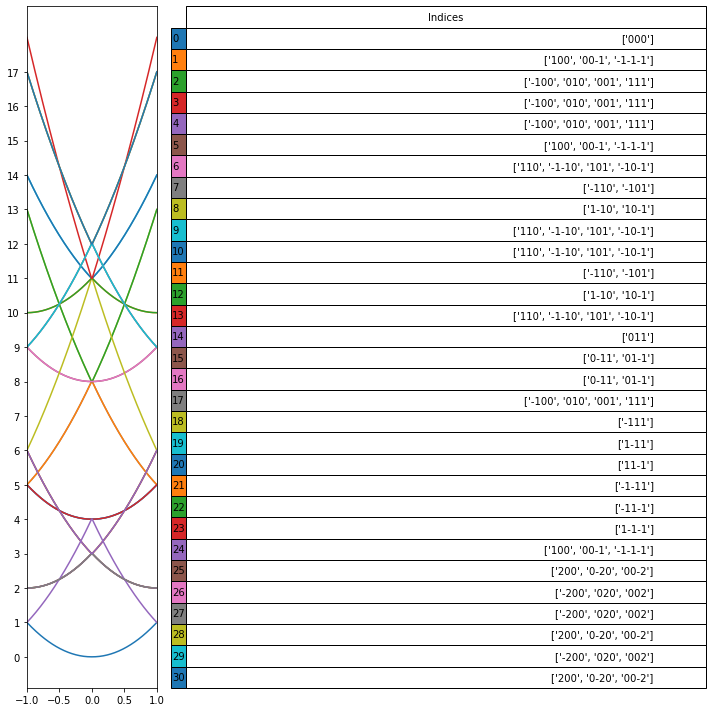

In [9]:
mu = np.linspace(0,1,100)
indices,En,df = main(1,0,0,mu,'FCC',Display=False,Half_zone=False,zone_table=True)

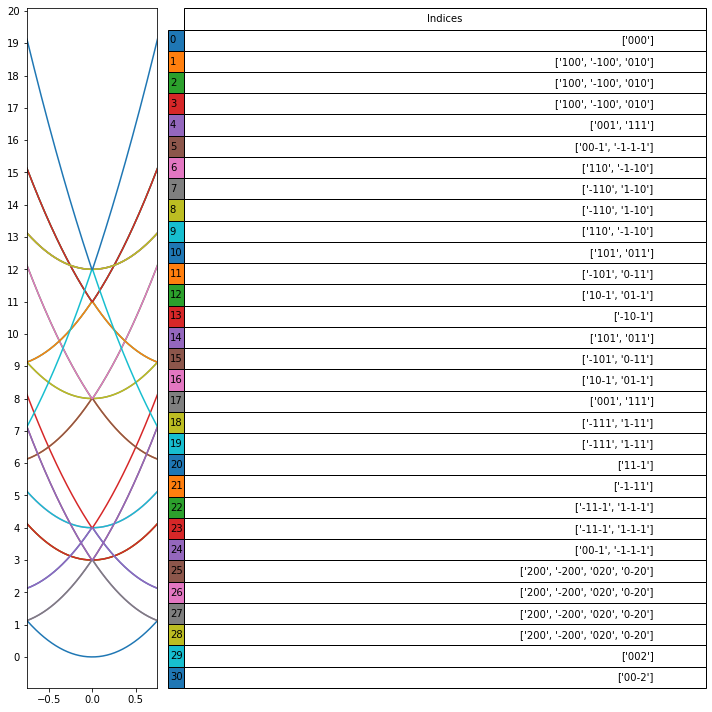

In [10]:
mu = np.linspace(0,3/4,100)
indices,En,df = main(1,1,0,mu,'FCC',Display=False,Half_zone=False,zone_table=True)

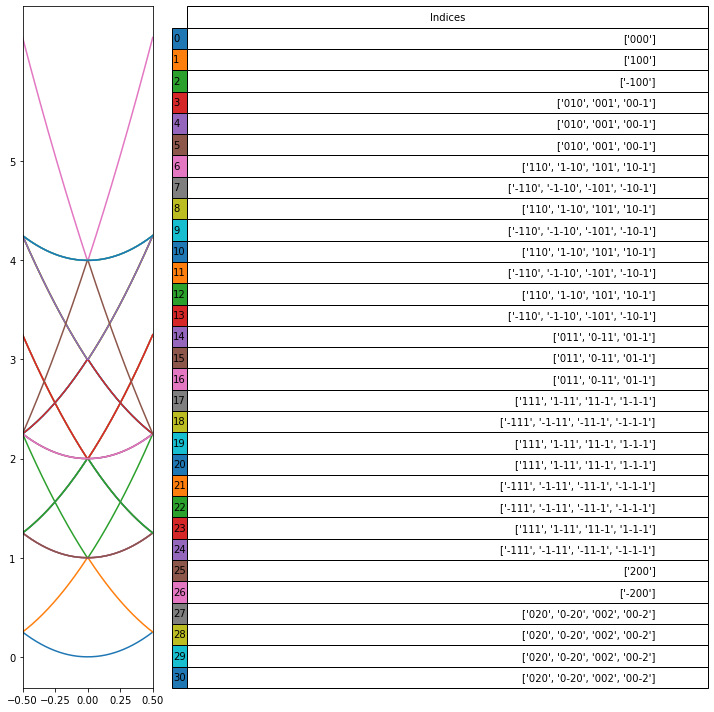

In [11]:
mu = np.linspace(0,1/2,100)
indices,En,df = main(1,0,0,mu,'SC',Display=False,Half_zone=False,zone_table=True)